In [12]:
import os  ; import sys  ; import platform  ;  import numpy as np       ; import matplotlib as mpl ; import pandas as pd
import matplotlib.pyplot as plt  ; import flopy.utils.binaryfile as bf  ; from pathlib import Path ; import flopy ; import config

Executable file found: E:\15_REPOS\b01_christianlangevin\00_gw3099_classrepo-master\exercises\bin\win64\mf2005.exe
Executable file found: E:\15_REPOS\b01_christianlangevin\00_gw3099_classrepo-master\exercises\bin\win64\mfnwt.exe
Executable file found: E:\15_REPOS\b01_christianlangevin\00_gw3099_classrepo-master\exercises\bin\win64\mp7.exe
Executable file found: E:\15_REPOS\b01_christianlangevin\00_gw3099_classrepo-master\exercises\bin\win64\mt3dms.exe
Executable file found: E:\15_REPOS\b01_christianlangevin\00_gw3099_classrepo-master\exercises\bin\win64\mt3dusgs.exe
Executable file found: E:\15_REPOS\b01_christianlangevin\00_gw3099_classrepo-master\exercises\bin\win64\mf6.exe
Executable file found: E:\15_REPOS\b01_christianlangevin\00_gw3099_classrepo-master\exercises\bin\win64\gridgen.exe


In [2]:
mfexe = 'E:\\15_REPOS\\00_BETAMI\\bin\\mfnwt'      ; mtexe = 'E:\\15_REPOS\\00_BETAMI\\bin\\mt3dusgs'
current_directory = os.getcwd();  print(current_directory)
output_folder = Path("./output")     ; output_folder.mkdir(exist_ok=True)

E:\15_REPOS\b01_christianlangevin\00_gw3099_classrepo-master\exercises\MT3DUSGS


In [3]:
modelname = '1D'  ; modelpth = output_folder ; 
mf = flopy.modflow.Modflow(modelname = modelname, exe_name='mfnwt', model_ws = modelpth, version='mfnwt')

In [4]:
Lx = 1000  ; Ly = 10 ;  nrow = 1 ;  ncol = 100 ;  nlay = 1     ; delr = Lx / ncol ; delc = Ly / nrow
xmax = ncol * delr       ;  ymax = nrow * delc
X, Y = np.meshgrid(np.linspace(delr / 2, xmax - delr / 2, ncol), np.linspace(ymax - delc / 2, 0 + delc / 2, nrow))   ; X ; 
df1 = pd.DataFrame(X)  ; df2 = pd.DataFrame(Y) #; pe = pd.concat([df1, df2], axis=1)  ; pe.columns = ["(x)", "(y)"]
df1.to_csv(output_folder/ 'a_X.csv') 

In [5]:
oc = flopy.modflow.ModflowOc(mf)     

In [6]:
headtol = 1.0E-4 ; fluxtol = 5 ; maxiterout = 5000 ; thickfact = 1E-06 ; linmeth = 2 ; iprnwt = 1 ; ibotav = 1       
nwt = flopy.modflow.ModflowNwt(mf, headtol=headtol, fluxtol=fluxtol, maxiterout=maxiterout,thickfact=thickfact, linmeth=linmeth, 
                               iprnwt=iprnwt, ibotav=ibotav,options='SIMPLE')

In [7]:
grndElv = 5  ; botm = 0.0           ; Steady = [False, False]; nstp = [1, 1] ; nper = 2 ; tsmult = 1. ; perlen = [100,3550]
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, nper=nper, delr=delr, delc=delc, top=grndElv, botm=botm, laycbd=0, itmuni=4, lenuni=2,
                               steady=Steady, nstp=nstp, tsmult=tsmult, perlen=perlen)

In [8]:
hdry = -1.00e+30  ; iphdry = 0
laytyp= 1 ;  layavg= 0 ;  chani= 1 ;  layvka= 0 ;  laywet= 0 ;  hk= 20 ;  hani= 1 ;  vka= 0.5 ;  ss= 0.000001 ;  sy= 0.2 ;  
upw = flopy.modflow.ModflowUpw(mf, laytyp=laytyp, layavg=layavg, chani=chani, layvka=layvka, laywet=laywet, ipakcb=53, 
                               hdry=hdry, iphdry=iphdry, hk=hk, vka=vka, ss=ss, sy=sy)

ibnd1 = np.ones((nrow, ncol)) ; sthd1 = np.ones((nrow, ncol)) * 10 ; hdry = -999
bas = flopy.modflow.ModflowBas(mf, ibound=ibnd1, hnoflo=hdry, strt=sthd1)

In [9]:
leftside_hd  = 40 ; rightside_hd = 10 ; cond         = 100 ;    elev_slp     = (308.82281 - 298.83649) / (ncol - 1)
sp = [] ;  sp.append([nlay - 1, nrow - 1, 0, leftside_hd, cond])  ; sp.append([nlay - 1, nrow - 1, ncol - 1, rightside_hd, cond])
ghb = flopy.modflow.ModflowGhb(mf, stress_period_data = sp)

In [10]:
lmt = flopy.modflow.ModflowLmt(mf, output_file_name='1D.ftl', output_file_header='extended',output_file_format='formatted')

In [13]:
mt = flopy.mt3d.Mt3dms(modflowmodel=mf, modelname=modelname, model_ws=modelpth,                       # import config
                       version='mt3d-usgs', namefile_ext='mtnam', exe_name=config.mt3dusgsexe,
                       ftlfilename='1D.ftl', ftlfree=True)

In [14]:
ncomp= 1 ;  lunit= 'FT' ;  sconc= 0 ;  prsity= sy ;  cinact= -1 ;  thkmin= 0.000001 ;  nprs= -1 ;  
nprobs= 10 ;  nprmas= 10 ;  dt0= 1 ;  nstp= 1 ;  mxstrn= 500 ;  ttsmult= 1 ;  ttsmax= 100 ;  
btn = flopy.mt3d.Mt3dBtn(mt, MFStyleArr=True, DRYCell=True, lunit=lunit, sconc=sconc, ncomp=ncomp, prsity=prsity, cinact=cinact,
                         thkmin=thkmin, nprs=nprs, nprobs=nprobs, chkmas=True,nprmas=nprmas, dt0=dt0, nstp=nstp, 
                         mxstrn=mxstrn, ttsmult=ttsmult, ttsmax=ttsmax)

In [15]:
mixelm =   -1 ; percel =    1.0000 ; mxpart = 5000 ; nadvfd =    1      # (1 = Upstream weighting)
adv = flopy.mt3d.Mt3dAdv(mt, mixelm=mixelm, percel=percel, mxpart=mxpart, nadvfd=nadvfd)

In [16]:
itype = flopy.mt3d.Mt3dSsm.itype_dict()
mxss = 2          # maximum number of boundary conditions
ssm_data = {}
#                kss,      iss, jss,  css,        ITYPE
ssm_data[0] = [(nlay - 1, nrow - 1,   0, 100., itype['GHB'])]
ssm_data[1] = [(nlay - 1, nrow - 1,   0,   0., itype['GHB'])]
ssm = flopy.mt3d.Mt3dSsm(mt, mxss=mxss, stress_period_data=ssm_data)

In [17]:
mxiter = 1 ;  iter1 = 200 ;  isolve = 3 ;  ncrs = 0 ;  accl = 1 ;  cclose = 0.000001 ;  iprgcg = 5 ;  
gcg = flopy.mt3d.Mt3dGcg(mt, mxiter=mxiter, iter1=iter1, isolve=isolve, ncrs=ncrs, accl=accl, cclose=cclose, iprgcg=iprgcg) # SOLVER

### Write the MODFLOW & MT3D-USGS input files for inspection and run the model.


In [38]:
mf.write_input()  ; mt.write_input()     ; mf.run_model() ; mt.run_model()

FloPy is using the following executable to run the model: C:\Users\gross.DESKTOP-AIRQM2M\anaconda3\Scripts\mfnwt.exe

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.3.0 07/01/2022                        
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.05.0 03/10/2022                       

 Using NAME file: 1D.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2025/03/28 15:54:19

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2025/03/28 15:54:19
 Elapsed run time:  0.010 Seconds

  Normal termination of simulation
FloPy is using the following executable to run the model: ..\..\bin\win

(False, [])

In [19]:
def set_plot_params():
    import matplotlib as mpl
    from matplotlib.font_manager import FontProperties
    mpl.rcParams['font.sans-serif']          = 'Arial'
    mpl.rcParams['font.serif']               = 'Times'
    mpl.rcParams['font.cursive']             = 'Zapf Chancery'
    mpl.rcParams['font.fantasy']             = 'Comic Sans MS'
    mpl.rcParams['font.monospace']           = 'Courier New'
    mpl.rcParams['pdf.compression']          = 0
    mpl.rcParams['pdf.fonttype']             = 42
    
    ticksize = 10
    mpl.rcParams['legend.fontsize']  = 9
    mpl.rcParams['axes.labelsize']   = 12
    mpl.rcParams['xtick.labelsize']  = ticksize
    mpl.rcParams['ytick.labelsize']  = ticksize
    return

In [40]:
headobj = bf.HeadFile(os.path.join(modelpth,'{0}.hds'.format('1D')))   ; ckstpkper = headobj.get_kstpkper()
ucn = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001')))   ; totim = ucn.get_times()
rslt = []
for tm in totim:
    rsltTS = ucn.get_data(totim = tm)  ;   rslt.append(rsltTS)
rslt = np.array(rslt)                  ;   rslt.shape   # [time-steps, layer, row, columns]

(600, 1, 1, 100)

### Have a look at the advection-only solution at two different times

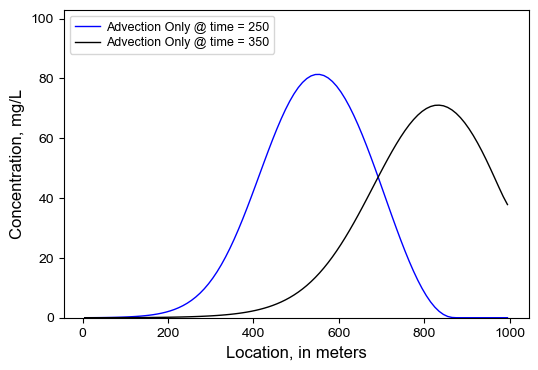

In [41]:
try:
    plt.close('all')
except:
    pass
set_plot_params()  ; fig = plt.figure(figsize=(6, 4), facecolor='w')   ; ax = fig.add_subplot(1, 1, 1)
ax.plot(X[0,:], rslt[249,0,0,:], 'b-', linewidth=1.0)                  ; ax.plot(X[0,:], rslt[349,0,0,:], 'k-', linewidth=1.0)

ax.set_xlabel('Location, in meters') ; ax.set_ylabel('Concentration, mg/L') ; ax.set_ylim([0,103]) ; ticksize = 10
leg = ax.legend(('Advection Only @ time = 250','Advection Only @ time = 350'), loc='upper left', labelspacing=0.25, columnspacing=1,
                handletextpad=0.5, handlelength=2.0, numpoints=1)
leg._drawFrame = False 
plt.show()

## **Next** 

In [22]:
al     = 10.0        # longitudinal dispersivity
trpt   =  0.1        # ratio of the horizontal transverse dispersivity to 'AL'
trpv   =  0.1        # ratio of the vertical transverse dispersitvity to 'AL'
dmcoef =  1.0000e-10

dsp = flopy.mt3d.Mt3dDsp(mt, al=al, trpt=trpt, trpv=trpv, dmcoef=dmcoef,
                         multiDiff=True)

# with the DSP package turned on, rerun the transport simulation
mt.write_input()
mt.run_model()


FloPy is using the following executable to run the model: ..\..\bin\win64\mt3dusgs.exe

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: 1D.mtnam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    100.00    

 Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   23.97      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4657E-09  [K,I,J]    1    1    6
 Transport Step:    2   Step Size:   1.000     Total Elapsed Time:   2.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   1.338      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3725E-08  [K,I,J]    1    1    4
 Transport Step:    3   Step Size:   1.000     Total Elapsed Time:   3.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC 

(False, [])

### Post-process: Advection with Dispersion

Having rerun the transport model.  Re-process the model output and compare the 

<>:39: SyntaxWarning: invalid escape sequence '\ '
<>:39: SyntaxWarning: invalid escape sequence '\ '
C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_12528\880878229.py:39: SyntaxWarning: invalid escape sequence '\ '
  'Advection Only', 'Advection w\ Dispersion'


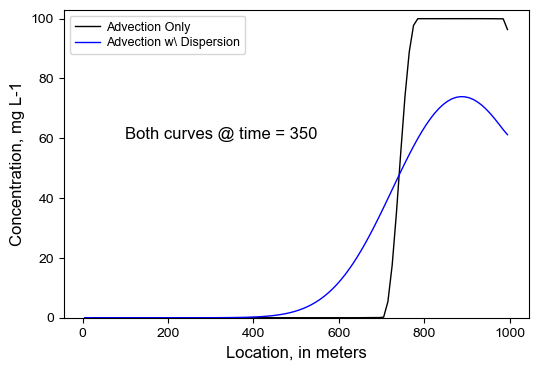

In [23]:
ucn = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001')))

totim = ucn.get_times()

rslt_dsp = []

for tm in totim:
    rsltTS = ucn.get_data(totim = tm)
    rslt_dsp.append(rsltTS)

rslt_dsp = np.array(rslt_dsp)

rslt_dsp.shape


## Set up figure
try:
    plt.close('all')
except:
    pass

set_plot_params()

fig = plt.figure(figsize=(6, 4), facecolor='w')
ax = fig.add_subplot(1, 1, 1)

ax.plot(X[0,:], rslt[349,0,0,:], 'k-', linewidth=1.0)
ax.plot(X[0,:], rslt_dsp[349,0,0,:], 'b-', linewidth=1.0)

#customize plot
ax.set_xlabel('Location, in meters')
ax.set_ylabel('Concentration, mg L-1')
ax.set_ylim([0,103])
ticksize = 10

#legend
leg = ax.legend(
                (
                 'Advection Only', 'Advection w\ Dispersion'
                 ), 
                loc='upper left', labelspacing=0.25, columnspacing=1,
                handletextpad=0.5, handlelength=2.0, numpoints=1)
leg._drawFrame = False 
ax.text(100, 60, 'Both curves @ time = 350', fontsize=12)

plt.show()


### Next, examine the affects of sorption through the use of the reaction package
### Instantiate reaction (RCT) package for MT3D-USGS

In [24]:
isothm    = 1  # 1: Linear; 2: Freundlich; 3: Langmuir; 4: 1st-order kinetic sorption
ireact    = 0  # 0: no kinetic rate reaction; 1: 1st-order irreversible reaction
irctop    = 2  # >=2: rct variables entered as arrays; <2: rct variables 1D by layer
igetsc    = 0
ireaction = 0
rhob      = 2.0e+3
srconc    = np.zeros((nlay, nrow, ncol))

sp1       = 1.e-4    # Distribution Coefficient (Kd)
sp2       =   0.0    # read, but not used with isothm = 1

rct = flopy.mt3d.Mt3dRct(mt, isothm=isothm, ireact=ireact, igetsc=igetsc,
                         sp1=sp1, srconc=srconc)


### Rerun transport simulation with the RCT package now activated

In [25]:
mt.write_input()
mt.run_model()

FloPy is using the following executable to run the model: ..\..\bin\win64\mt3dusgs.exe

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: 1D.mtnam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    100.00    

 Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   13.75      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.1490E-07  [K,I,J]    1    1    3
 Transport Step:    2   Step Size:   1.000     Total Elapsed Time:   2.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   1.099      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.9313E-09  [K,I,J]    1    1    4
 Transport Step:    3   Step Size:   1.000     Total Elapsed Time:   3.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC 

(False, [])

### Plot the new results

<>:34: SyntaxWarning: invalid escape sequence '\ '
<>:35: SyntaxWarning: invalid escape sequence '\ '
<>:34: SyntaxWarning: invalid escape sequence '\ '
<>:35: SyntaxWarning: invalid escape sequence '\ '
C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_12528\2017852752.py:34: SyntaxWarning: invalid escape sequence '\ '
  lns2 = ax.plot(X[0,:], rslt_dsp[349,0,0,:], 'b-', linewidth=1.0, label = 'Advection w\ Dispersion')
C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_12528\2017852752.py:35: SyntaxWarning: invalid escape sequence '\ '
  lns3 = ax.plot(X[0,:], rslt_rct1[349,0,0,:], 'r-', linewidth=2.0, label = 'Adv, Dsp, w\ Linear Sorption')


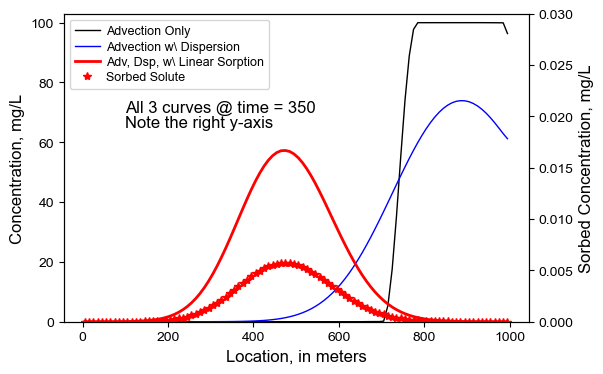

In [26]:
ucn  = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001')))
ucns = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001s')))

totim = ucn.get_times()

rslt_rct1 = []
rslt_rct1s = []

for tm in totim:
    rsltTS = ucn.get_data(totim = tm)
    rsltTSs = ucns.get_data(totim = tm)
    rslt_rct1.append(rsltTS)
    rslt_rct1s.append(rsltTSs)

rslt_rct1 = np.array(rslt_rct1)
rslt_rct1s = np.array(rslt_rct1s)

rslt_rct1.shape
rslt_rct1s.shape

## Set up figure
try:
    plt.close('all')
except:
    pass

set_plot_params()

fig = plt.figure(figsize=(6, 4), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax2 = plt.twinx()

lns1 = ax.plot(X[0,:], rslt[349,0,0,:], 'k-', linewidth=1.0, label = 'Advection Only')
lns2 = ax.plot(X[0,:], rslt_dsp[349,0,0,:], 'b-', linewidth=1.0, label = 'Advection w\ Dispersion')
lns3 = ax.plot(X[0,:], rslt_rct1[349,0,0,:], 'r-', linewidth=2.0, label = 'Adv, Dsp, w\ Linear Sorption')
pts1 = ax2.plot(X[0,:], rslt_rct1s[349,0,0,:], 'r*', linewidth=2.0, label = 'Sorbed Solute')

#customize plot
ax.set_xlabel('Location, in meters')
ax.set_ylabel('Concentration, mg/L')
ax2.set_ylabel('Sorbed Concentration, mg/L')
ax.set_ylim([0,103])
ax2.set_ylim([0,0.03])
ticksize = 10

# add 4 items to legend
lns = lns1+lns2+lns3+pts1
labs = [l.get_label() for l in lns]

#legend
leg = ax.legend(lns, labs, 
                loc='upper left', labelspacing=0.25, columnspacing=1,
                handletextpad=0.5, handlelength=2.0, numpoints=1)
leg._drawFrame = False 
ax.text(100, 70, 'All 3 curves @ time = 350', fontsize=12)
ax.text(100, 65, 'Note the right y-axis', fontsize=12)

plt.show()


### Now add non-equilibrium sorption

Before running the code that follows, what do you think 
non-equilibrium sorption will do to the red curve?
* Slow the advance of solute? 
* Change the shape of the curve?

In [27]:
# Manipulate RCT input variables to simulate non-equilibrium sorption

rct.isothm = 4
rct.sp2[0][0][:] = 1e-3  # Need to set sp2 term

# sticking with the linear isotherm

mt.write_input()
mt.run_model()


FloPy is using the following executable to run the model: ..\..\bin\win64\mt3dusgs.exe

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: 1D.mtnam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    100.00    

 Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   23.87      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.9313E-09  [K,I,J]    1    1    6
 Transport Step:    2   Step Size:   1.000     Total Elapsed Time:   2.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   1.333      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3725E-08  [K,I,J]    1    1    4
 Transport Step:    3   Step Size:   1.000     Total Elapsed Time:   3.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC 

(False, [])

### Plot the new results

<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:37: SyntaxWarning: invalid escape sequence '\ '
C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_12528\3538125416.py:37: SyntaxWarning: invalid escape sequence '\ '
  lns4 = ax.plot(X[0,:], rslt_rcte[350,0,0,:], 'g-', linewidth=2.0, label = 'Adv, Dsp, w\ Non-eq. Lin. Sorp.')


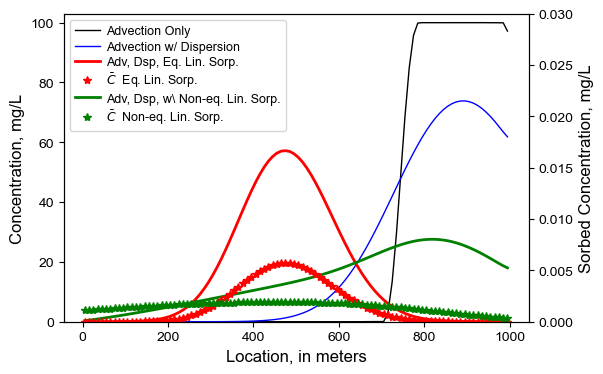

In [28]:
ucn  = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001')))
ucns = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001s')))

totim = ucn.get_times()

rslt_rcte = []
rslt_rctes = []

for tm in totim:
    rsltTS = ucn.get_data(totim = tm)
    rsltTSs = ucns.get_data(totim = tm)
    rslt_rcte.append(rsltTS)
    rslt_rctes.append(rsltTSs)

rslt_rcte = np.array(rslt_rcte)
rslt_rctes = np.array(rslt_rctes)

rslt_rcte.shape
rslt_rctes.shape

## Set up figure
try:
    plt.close('all')
except:
    pass

set_plot_params()

fig = plt.figure(figsize=(6, 4), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax2 = plt.twinx()

lns1 = ax.plot(X[0,:], rslt[350,0,0,:], 'k-', linewidth=1.0, label = 'Advection Only')
lns2 = ax.plot(X[0,:], rslt_dsp[350,0,0,:], 'b-', linewidth=1.0, label = 'Advection w/ Dispersion')
lns3 = ax.plot(X[0,:], rslt_rct1[350,0,0,:], 'r-', linewidth=2.0, label = 'Adv, Dsp, Eq. Lin. Sorp.')
pts1 = ax2.plot(X[0,:], rslt_rct1s[350,0,0,:], 'r*', linewidth=2.0, label = r'$\bar{C}$  Eq. Lin. Sorp.')
lns4 = ax.plot(X[0,:], rslt_rcte[350,0,0,:], 'g-', linewidth=2.0, label = 'Adv, Dsp, w\ Non-eq. Lin. Sorp.')
pts2 = ax2.plot(X[0,:], rslt_rctes[350,0,0,:], 'g*', linewidth=2.0, label = r'$\bar{C}$  Non-eq. Lin. Sorp.')

# add 4 items to legend
lns = lns1+lns2+lns3+pts1+lns4+pts2
labs = [l.get_label() for l in lns]

#customize plot
ax.set_xlabel('Location, in meters')
ax.set_ylabel('Concentration, mg/L')
ax2.set_ylabel('Sorbed Concentration, mg/L')
ax.set_ylim([0,103])
ax2.set_ylim([0,0.03])
ticksize = 10

#legend
leg = ax.legend(lns, labs, 
                loc='upper left', labelspacing=0.25, columnspacing=1,
                handletextpad=0.5, handlelength=2.0, numpoints=1)
leg._drawFrame = False 

plt.show()


##### Do the green lines make sense?

### Now add decay

In [29]:
# Need to manipulate some RCT parameters (see comments below for more details)

rct.isothm = 1            # Turn off non-eq. sorption & switch on linear isotherm
rct.ireact = 1            # This switches on 1st order irreversible reaction
rct.rc1[0][0][:] = 5e-3   # 1st order reaction rate for the dissolved phase
rct.rc2[0][0][:] = 1e-4   # 1st order reaction rate for the sorbed phase

mt.write_input()
mt.run_model()

FloPy is using the following executable to run the model: ..\..\bin\win64\mt3dusgs.exe

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: 1D.mtnam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    100.00    

 Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   13.72      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.1192E-06  [K,I,J]    1    1    2
 Transport Step:    2   Step Size:   1.000     Total Elapsed Time:   2.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   1.097      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.9313E-09  [K,I,J]    1    1    4
 Transport Step:    3   Step Size:   1.000     Total Elapsed Time:   3.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC 

(False, [])

### Plot the results with Decay activated:

<>:31: SyntaxWarning: invalid escape sequence '\ '
<>:34: SyntaxWarning: invalid escape sequence '\ '
<>:31: SyntaxWarning: invalid escape sequence '\ '
<>:34: SyntaxWarning: invalid escape sequence '\ '
C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_12528\2587240505.py:31: SyntaxWarning: invalid escape sequence '\ '
  lns2 = ax.plot(X[0,:], rslt_dsp[350,0,0,:], 'b-', linewidth=1.0, label = 'Advection w\ Dispersion')
C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_12528\2587240505.py:34: SyntaxWarning: invalid escape sequence '\ '
  lns4 = ax.plot(X[0,:], rslt_rct2[350,0,0,:], 'c-', linewidth=2.0, label = 'Adv, Dsp, Sorp., w\ Decay')


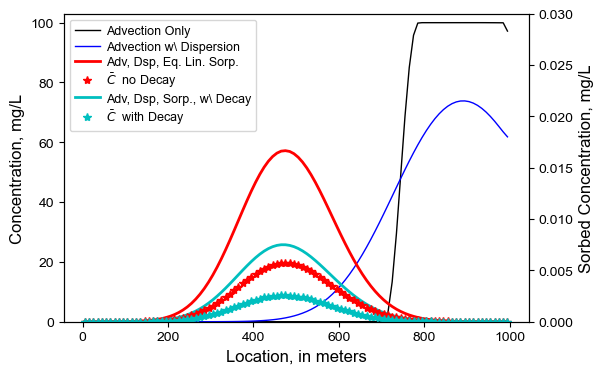

In [30]:
ucn  = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001')))
ucns = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001s')))

totim = ucn.get_times()

rslt_rct2 = []
rslt_rct2s = []

for tm in totim:
    rsltTS = ucn.get_data(totim = tm)
    rsltTSs = ucns.get_data(totim = tm)
    rslt_rct2.append(rsltTS)
    rslt_rct2s.append(rsltTSs)

rslt_rct2 = np.array(rslt_rct2)
rslt_rct2s = np.array(rslt_rct2s)

## Set up figure
try:
    plt.close('all')
except:
    pass

set_plot_params()

fig = plt.figure(figsize=(6, 4), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax2 = plt.twinx()

lns1 = ax.plot(X[0,:], rslt[350,0,0,:], 'k-', linewidth=1.0, label = 'Advection Only')
lns2 = ax.plot(X[0,:], rslt_dsp[350,0,0,:], 'b-', linewidth=1.0, label = 'Advection w\ Dispersion')
lns3 = ax.plot(X[0,:], rslt_rct1[350,0,0,:], 'r-', linewidth=2.0, label = 'Adv, Dsp, Eq. Lin. Sorp.')
pts1 = ax2.plot(X[0,:], rslt_rct1s[350,0,0,:], 'r*', linewidth=2.0, label = r'$\bar{C}$  no Decay')
lns4 = ax.plot(X[0,:], rslt_rct2[350,0,0,:], 'c-', linewidth=2.0, label = 'Adv, Dsp, Sorp., w\ Decay')
pts2 = ax2.plot(X[0,:], rslt_rct2s[350,0,0,:], 'c*', linewidth=2.0, label = r'$\bar{C}$  with Decay')

# add 4 items to legend
lns = lns1+lns2+lns3+pts1+lns4+pts2
labs = [l.get_label() for l in lns]

#customize plot
ax.set_xlabel('Location, in meters')
ax.set_ylabel('Concentration, mg/L')
ax2.set_ylabel('Sorbed Concentration, mg/L')
ax.set_ylim([0,103])
ax2.set_ylim([0,0.03])
ticksize = 10

#legend
leg = ax.legend(lns, labs,
                loc='upper left', labelspacing=0.25, columnspacing=1,
                handletextpad=0.5, handlelength=2.0, numpoints=1)
leg._drawFrame = False 

plt.show()


### Have a look at some of the non-linear isotherms

In [31]:
rct.isothm = 2             # Freundlich
rct.ireact = 0             # Switches off reactions
rct.sp1[0][0][0,:] = 1e-4  # Kf
rct.sp2[0][0][0,:] = 1.25  # alpha

mt.write_input()
mt.run_model()


FloPy is using the following executable to run the model: ..\..\bin\win64\mt3dusgs.exe

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: 1D.mtnam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    100.00    

 Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   23.97      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4657E-09  [K,I,J]    1    1    6
 Transport Step:    2   Step Size:   1.000     Total Elapsed Time:   2.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.3148      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.3638E-11  [K,I,J]    1    1    8
 Transport Step:    3   Step Size:   1.000     Total Elapsed Time:   3.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC 

(False, [])

### Plot the results after simulating with a non-linear sorption

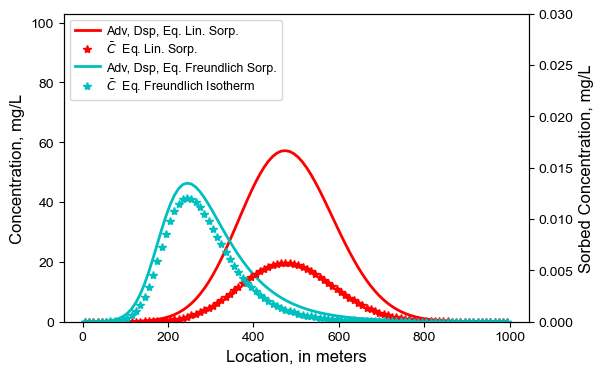

In [32]:
ucn  = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001')))
ucns = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001s')))

totim = ucn.get_times()

rslt_rctf = []
rslt_rctfs = []

for tm in totim:
    rsltTS = ucn.get_data(totim = tm)
    rsltTSs = ucns.get_data(totim = tm)
    rslt_rctf.append(rsltTS)
    rslt_rctfs.append(rsltTSs)

rslt_rctf = np.array(rslt_rctf)
rslt_rctfs = np.array(rslt_rctfs)


## Set up figure
try:
    plt.close('all')
except:
    pass

set_plot_params()

fig = plt.figure(figsize=(6, 4), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax2 = plt.twinx()

lns1 = ax.plot(X[0,:], rslt_rct1[350,0,0,:], 'r-', linewidth=2.0, label = 'Adv, Dsp, Eq. Lin. Sorp.')
pts1 = ax2.plot(X[0,:], rslt_rct1s[350,0,0,:], 'r*', linewidth=2.0, label = r'$\bar{C}$  Eq. Lin. Sorp.')
lns2 = ax.plot(X[0,:], rslt_rctf[350,0,0,:], 'c-', linewidth=2.0, label = 'Adv, Dsp, Eq. Freundlich Sorp.')
pts2 = ax2.plot(X[0,:], rslt_rctfs[350,0,0,:], 'c*', linewidth=2.0, label = r'$\bar{C}$  Eq. Freundlich Isotherm')

# add 4 items to legend
lns = lns1+pts1+lns2+pts2
labs = [l.get_label() for l in lns]

#customize plot
ax.set_xlabel('Location, in meters')
ax.set_ylabel('Concentration, mg/L')
ax2.set_ylabel('Sorbed Concentration, mg/L')
ax.set_ylim([0,103])
ax2.set_ylim([0,0.03])
ticksize = 10

#legend
leg = ax.legend(lns, labs,
                loc='upper left', labelspacing=0.25, columnspacing=1,
                handletextpad=0.5, handlelength=2.0, numpoints=1)
leg._drawFrame = False 

plt.show()


What do you notice about the new curves? 

Open up the MT3D-USGS list file and have a look at the percent discrepancy Totim = 300
In a text editor, search for: 

__TOTAL ELAPSED TIME SINCE BEGINNING OF SIMULATION =   300.0000__


Let's make the curve a little more non-linear, now what do you notice with the 
  % discrepancy

What gives?

In [33]:
rct.sp2[0][0][0,:] = 2.25 # alpha was 1.25 previously

mt.write_input()
mt.run_model()

FloPy is using the following executable to run the model: ..\..\bin\win64\mt3dusgs.exe

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: 1D.mtnam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    100.00    

 Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   23.97      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4657E-09  [K,I,J]    1    1    6
 Transport Step:    2   Step Size:   1.000     Total Elapsed Time:   2.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.1314E-01  [K,I,J]    1    1    3
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.1455E-10  [K,I,J]    1    1    7
 Transport Step:    3   Step Size:   1.000     Total Elapsed Time:   3.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC 

(False, [])

You should see a mass balance error > 40%
I got: 
    
__DISCREPANCY (PERCENT):   -42.4314__

What is the Freundlich Isotherm:
\begin{equation*}
\bar{C} = K_f C^\alpha
\end{equation*}

Taking the derivative w.r.t. the dissolved concentration, which tells us about the gradient between the dissolved and sorbed phases 

\begin{equation*}
\frac{\partial \bar{C}}{\partial C} = \alpha K_f C^{\alpha - 1}
\end{equation*}

In [34]:
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def calc_sorb_C(x, a=1, Kf=1):
    y = []
    
    for i in x:
        sorb_C = Kf*i**(a)
        y.append(sorb_C)
        
    y = np.array(y)
    return y
        
solute_C = np.arange(0.0,2.1,0.02)
sorbed_C_lt = calc_sorb_C(solute_C, a=0.5, Kf=1)
sorbed_C_eq = calc_sorb_C(solute_C, a=1, Kf=1)
sorbed_C_gt = calc_sorb_C(solute_C, a=2, Kf=1)   # try changing the 2 to a 3

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.25, hspace=0.25)

ax = fig.add_subplot(1, 1, 1)
ax.plot(solute_C, sorbed_C_lt, linewidth=2, color='red', label=r'$\alpha < 1$')
ax.plot(solute_C, sorbed_C_eq, linewidth=2, color='black', label=r'$\alpha = 1$')
ax.plot(solute_C, sorbed_C_gt, linewidth=2, color='blue', label=r'$\alpha > 1$')
ax.set_xlim([0,2.05])
ax.set_ylim([0,2.05])

leg = ax.legend(loc='upper left')
leg.draw_frame(False)
ax.set_xlabel('Solute Concentration, C')
plt.ylabel(r'Sorbed Concentration, $\bar{C}$')


Text(0, 0.5, 'Sorbed Concentration, $\\bar{C}$')

So, what is the fix for the mass balance problem?  In the GCG solver package, up 'MXITER' (The maximum number of outer iterations) from 1 to 10 (or higher)

In [35]:
rct.sp2[0][0][0,:] = 1.5  # ease up on the non-linearity alpha
gcg.mxiter = 200          # give it some outer iterations to work with
gcg.isolve = 3

mt.write_input()
mt.run_model()

FloPy is using the following executable to run the model: ..\..\bin\win64\mt3dusgs.exe

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: 1D.mtnam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    100.00    

 Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   23.97      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4657E-09  [K,I,J]    1    1    6
 Outer Iter.  2  Inner Iter.  1:  Max. DC =  0.8428      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  2:  Max. DC =  0.4657E-09  [K,I,J]    1    1    4
 Outer Iter.  3  Inner Iter.  1:  Max. DC =   1.034      [K,I,J]    1    1    1
 Outer Iter.  3  Inner Iter.  2:  Max. DC =  0.9095E-12  [K,I,J]    1    1    8
 Outer Iter.  4  Inner Iter.  1:  Max. DC 

(False, [])

 Outer Iter.  1  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  1:  Max. DC =  0.6809E-04  [K,I,J]    1    1  100
 Outer Iter.  2  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  3  Inner Iter.  1:  Max. DC =   0.000      [K,I,J]    1    1    1
 Transport Step:  450   Step Size:   1.000     Total Elapsed Time:   550.00    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2612E-02  [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  1:  Max. DC =  0.6853E-04  [K,I,J]    1    1  100
 Outer Iter.  2  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  3  Inner Iter.  1:  Max. DC =   0.000      [K,I,J]    1    1    1
 Transport Step:  451   Step Size:   1.000     Total Elapsed Time:   551.00    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2627E-02  [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. D

(False, [])

Now what is the new mass balance error?  [I got: DISCREPANCY (PERCENT):  -0.6998680]

### Now rerun the transport model with $\alpha$ < 1 in the Freundlich Isotherm

In [36]:
rct.sp2[0][0][0,:] = 0.5  # ease up on the non-linearity alpha

mt.write_input()
mt.run_model()


FloPy is using the following executable to run the model: ..\..\bin\win64\mt3dusgs.exe

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: 1D.mtnam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    100.00    

 Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =   23.97      [K,I,J]    1    1    1
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.4657E-09  [K,I,J]    1    1    6
 Outer Iter.  2  Inner Iter.  1:  Max. DC =  0.7409E-01  [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  2:  Max. DC =  0.3638E-11  [K,I,J]    1    1    7
 Outer Iter.  3  Inner Iter.  1:  Max. DC =  0.3234E-02  [K,I,J]    1    1    1
 Outer Iter.  3  Inner Iter.  2:  Max. DC =  0.7390E-12  [K,I,J]    1    1    6
 Outer Iter.  4  Inner Iter.  1:  Max. DC 

(False, [])

 Outer Iter.  4  Inner Iter.  1:  Max. DC =   0.000      [K,I,J]    1    1    1
 Transport Step:  335   Step Size:   1.000     Total Elapsed Time:   435.00    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2240      [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  1:  Max. DC =  0.1269E-02  [K,I,J]    1    1  100
 Outer Iter.  2  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  3  Inner Iter.  1:  Max. DC =  0.6497E-05  [K,I,J]    1    1  100
 Outer Iter.  3  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  4  Inner Iter.  1:  Max. DC =   0.000      [K,I,J]    1    1    1
 Transport Step:  336   Step Size:   1.000     Total Elapsed Time:   436.00    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2241      [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  1:  Max. D

 Transport Step:  423   Step Size:   1.000     Total Elapsed Time:   523.00    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2213      [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  1:  Max. DC =  0.2298E-02  [K,I,J]    1    1  100
 Outer Iter.  2  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  3  Inner Iter.  1:  Max. DC =  0.2223E-04  [K,I,J]    1    1  100
 Outer Iter.  3  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  4  Inner Iter.  1:  Max. DC =   0.000      [K,I,J]    1    1    1
 Transport Step:  424   Step Size:   1.000     Total Elapsed Time:   524.00    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2212      [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  1:  Max. DC =  0.2315E-02  [K,I,J]    1    1  100
 Outer Iter.  2  Inner Iter.  2:  Max. D

 Outer Iter.  4  Inner Iter.  1:  Max. DC =   0.000      [K,I,J]    1    1    1
 Transport Step:  490   Step Size:   1.000     Total Elapsed Time:   590.00    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2084      [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  1:  Max. DC =  0.3467E-02  [K,I,J]    1    1  100
 Outer Iter.  2  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  3  Inner Iter.  1:  Max. DC =  0.5358E-04  [K,I,J]    1    1  100
 Outer Iter.  3  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  4  Inner Iter.  1:  Max. DC =   0.000      [K,I,J]    1    1    1
 Transport Step:  491   Step Size:   1.000     Total Elapsed Time:   591.00    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2081      [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. DC =   0.000      [K,I,J]    1    1    1
 Outer Iter.  2  Inner Iter.  1:  Max. D

(False, [])

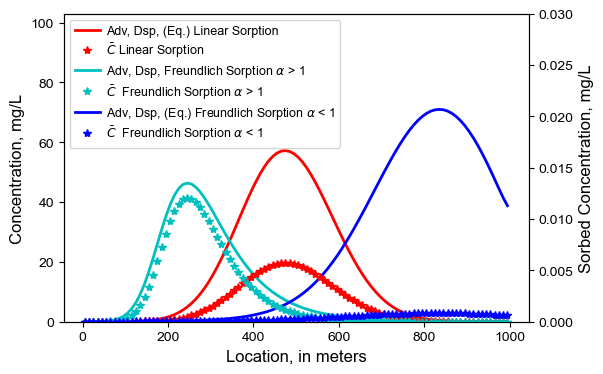

In [37]:
ucn  = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001')))
ucns = bf.UcnFile(os.path.join(modelpth,'{0}.ucn'.format('mt3d001s')))

totim = ucn.get_times()

rslt_rcta = []
rslt_rctas = []

for tm in totim:
    rsltTS = ucn.get_data(totim = tm)
    rsltTSs = ucns.get_data(totim = tm)
    rslt_rcta.append(rsltTS)
    rslt_rctas.append(rsltTSs)

rslt_rcta = np.array(rslt_rcta)
rslt_rctas = np.array(rslt_rctas)

rslt_rcta.shape
rslt_rctas.shape

## Set up figure
try:
    plt.close('all')
except:
    pass

set_plot_params()

fig = plt.figure(figsize=(6, 4), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
ax2 = plt.twinx()

lns1 = ax.plot(X[0,:], rslt_rct1[350,0,0,:], 'r-', linewidth=2.0, label = 'Adv, Dsp, (Eq.) Linear Sorption')
pts1 = ax2.plot(X[0,:], rslt_rct1s[350,0,0,:], 'r*', linewidth=2.0, label = r'$\bar{C}$ Linear Sorption')
lns2 = ax.plot(X[0,:], rslt_rctf[350,0,0,:], 'c-', linewidth=2.0, label = r'Adv, Dsp, Freundlich Sorption $\alpha$ > 1')
pts2 = ax2.plot(X[0,:], rslt_rctfs[350,0,0,:], 'c*', linewidth=2.0, label = r'$\bar{C}$  Freundlich Sorption $\alpha$ > 1')
lns3 = ax.plot(X[0,:], rslt_rcta[350,0,0,:], 'b-', linewidth=2.0, label = r'Adv, Dsp, (Eq.) Freundlich Sorption $\alpha$ < 1')
pts3 = ax2.plot(X[0,:], rslt_rctas[350,0,0,:], 'b*', linewidth=2.0, label = r'$\bar{C}$  Freundlich Sorption $\alpha$ < 1')

# add 4 items to legend
lns = lns1+pts1+lns2+pts2+lns3+pts3
labs = [l.get_label() for l in lns]

#customize plot
ax.set_xlabel('Location, in meters')
ax.set_ylabel('Concentration, mg/L')
ax2.set_ylabel('Sorbed Concentration, mg/L')
ax.set_ylim([0,103])
ax2.set_ylim([0,0.03])
ticksize = 10

#legend
leg = ax.legend(lns, labs,
                loc='upper left', labelspacing=0.25, columnspacing=1,
                handletextpad=0.5, handlelength=2.0, numpoints=1)
leg._drawFrame = False 

plt.show()
